<center> <h1  style="background-color:#7CCA62; color:white;">  Regression - find the best model </h1></center>  


<h3 style="background-color:#E5F4E0; color:#387026;">  Importing the libraries </h3>

In [270]:
import sqlite3
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

<h3 style="background-color:#E5F4E0; color:#387026;">  Importing the Dataset </h3>

In [271]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

Q1. Discorver your dataset and clean it if necessary

In [272]:
df.head()#Check head 

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [273]:
df.tail()#check tail

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


In [274]:
df.describe() #describe the data

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [275]:
df.corr()#calculate the correlation

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


(array([3.3000e+01, 3.0100e+02, 2.0710e+03, 8.5100e+03, 2.9584e+04,
        5.9449e+04, 5.4081e+04, 2.3726e+04, 5.0360e+03, 3.5100e+02]),
 array([33. , 39.1, 45.2, 51.3, 57.4, 63.5, 69.6, 75.7, 81.8, 87.9, 94. ]),
 <BarContainer object of 10 artists>)

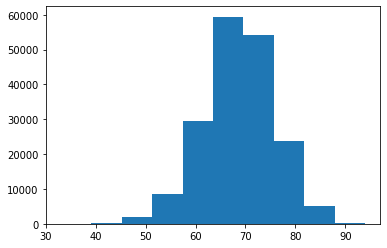

In [276]:
plt.hist(df['overall_rating']) #Ploting the distribution of the overall rating

(array([8.0000e+00, 6.8000e+01, 8.4300e+02, 7.0640e+03, 2.7157e+04,
        5.5621e+04, 5.8281e+04, 2.8454e+04, 5.4410e+03, 2.0500e+02]),
 array([39. , 44.8, 50.6, 56.4, 62.2, 68. , 73.8, 79.6, 85.4, 91.2, 97. ]),
 <BarContainer object of 10 artists>)

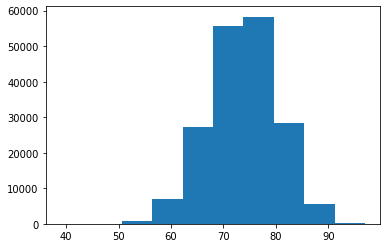

In [277]:
plt.hist(df['potential']) #Ploting the distribution of the potential

(array([   78.,   314.,  1294.,  5090., 19711., 46486., 65024., 37216.,
         7555.,   374.]),
 array([17. , 24.9, 32.8, 40.7, 48.6, 56.5, 64.4, 72.3, 80.2, 88.1, 96. ]),
 <BarContainer object of 10 artists>)

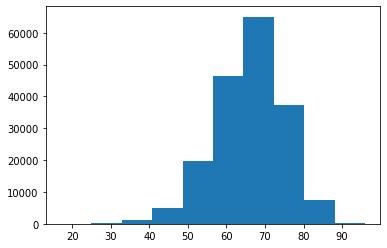

In [278]:
plt.hist(df['reactions']) #Ploting the distribution of reactions

## Cleaning the Data

In [279]:
df.drop(df.columns[[0, 1, 2,3]], axis = 1, inplace = True)#droping all id columns

In [280]:
df.isnull().sum() #checking null values

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

In [281]:
#looking at categorical data
print(df['defensive_work_rate'].unique())
print(df['attacking_work_rate'].unique())
print(df['preferred_foot'].unique())

['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']
['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
['right' 'left' None]


In [282]:
#cleaning categorical variable 'defensive_work_rate' by dropping all values other than low, medium and high
unacceptable=df[(df['defensive_work_rate'] != 'high') & (df['defensive_work_rate'] != 'medium')& (df['defensive_work_rate'] != 'low')].index
df.drop(unacceptable, inplace=True)

In [283]:
#cleaning categorical variable 'attacking_work_rate' by dropping all values other than low, medium and high
unacceptable_2=df[(df['attacking_work_rate'] != 'high') & (df['attacking_work_rate'] != 'medium')& (df['attacking_work_rate'] != 'low')].index
df.drop(unacceptable_2, inplace=True)

In [284]:
print(df['defensive_work_rate'].unique())
print(df['attacking_work_rate'].unique())

['medium' 'high' 'low']
['medium' 'high' 'low']


In [285]:
#Creating a pandas Series according the order of the values to replace categorical data with numerical values
ser=pd.Series([1,2,3],index=['low', 'medium','high' ])
ser1=pd.Series([1,2],index=['right', 'left'])
df['attacking_work_rate']=df['attacking_work_rate'].replace(ser)
df['defensive_work_rate']=df['defensive_work_rate'].replace(ser)
df['preferred_foot']=df['preferred_foot'].replace(ser1)

In [286]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [287]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Q2. Find the best model that can predict the y 'overall_rating'. You can try the following:
    <ol>
    <li>Linear regression
    <li>Polynomial regression
    <li>SGD regression

<br>Try to change in the paramteres of the algorithms while checking each time the accuracy, confusion matrix and other metrics (sensitivity, ...).

Example of parameters for SGD regression : <code>loss='squared_loss', alpha=0.1, penalty='l2', max_iter=1000, learning_rate='constant'</code><br>
Check the librairies documentations for other parameters... 

In [288]:
X = df.iloc[:,1:].values #all columns
y = df.iloc[:,0].values #overall_rating

In [289]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.25 , random_state=10)

In [290]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## 1.Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [292]:
print(regressor.coef_)
print(regressor.intercept_)

[ 2.47885808 -0.00582794 -0.12289118 -0.03692475  0.4148375   0.22050062
  1.14176089  0.7199502   0.08281867 -0.23154894  0.20838038  0.21540246
  0.08947323  2.04337088  0.08647196  0.11007516 -0.09978134  1.95478901
  0.09413956  0.28412069  0.1734906  -0.04543565  0.72380234 -0.25549234
  0.33206214  0.24693066 -0.18934346 -0.05554039  0.24396351  0.6550536
  0.05424873 -0.56952956  2.71206343  0.54780778 -0.74218956  0.90883788
  0.44859733]
68.69688919164396


In [293]:
y_pred_l = regressor.predict(X_test)
y_pred_l

array([70.13986199, 62.54503639, 63.32291209, ..., 71.70903218,
       78.01158136, 75.2454889 ])

In [294]:
#checking result accuracy
from sklearn.metrics import *
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 2.1393895581394227
Mean Squared Error: 7.855035625164908
Root Mean Squared Error: 2.802683647000658


## 2.Polynomial Regression

In [295]:
from sklearn.preprocessing import PolynomialFeatures #module
#choosing a degree of 2
PF =  PolynomialFeatures(degree = 2)
X_poly = PF.fit_transform(X_train)
#applying linear regression on X_poly
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [296]:
y_pred_p=regressor.predict(PF.fit_transform(X_test))
y_pred_p

array([68.76230621, 62.61672974, 60.02929688, ..., 68.57014465,
       79.05517578, 77.89328003])

In [297]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_p))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_p))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_p)))

Mean Absolute Error: 1.047762869857442
Mean Squared Error: 2.0367537553025827
Root Mean Squared Error: 1.427148820306622


## 3. Stochastic Gradient Descent

In [298]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(loss='squared_loss', alpha=0.1, penalty='l2', max_iter=1000, learning_rate='constant')
reg.fit(X_train, y_train)
y_pred_s = reg.predict(X_test)
y_pred_s

array([73.67789868, 60.58056003, 63.78023876, ..., 71.33091925,
       75.42854559, 80.64617247])

In [299]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_s))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_s))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_s)))

Mean Absolute Error: 2.450468867684765
Mean Squared Error: 10.289919707960406
Root Mean Squared Error: 3.207790471330758


In [300]:
sgd = SGDRegressor(max_iter=1000,tol=1e-3,alpha=0.05)
sgd.fit(X_train, y_train)
y_pred2 = sgd.predict(X_test)
y_pred2 

array([69.25835074, 62.27489825, 64.26268203, ..., 71.5172837 ,
       77.31650055, 75.03582304])

In [301]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 2.155651462723744
Mean Squared Error: 7.995876191139466
Root Mean Squared Error: 2.8276980374749114


In [302]:
sgd3 = SGDRegressor(loss='squared_epsilon_insensitive',max_iter=1000,tol=1e-3,alpha=0.0001,penalty='l1',learning_rate='optimal')
sgd3.fit(X_train, y_train)
y_pred3 = sgd3.predict(X_test)
y_pred3 

array([69.53695721, 62.63769857, 63.6467823 , ..., 71.54361367,
       77.6237379 , 74.30333285])

In [303]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 2.153596683699604
Mean Squared Error: 7.981182999738717
Root Mean Squared Error: 2.825098759289437


In [304]:
#create a dataFrame from dictionnaries
compare_model = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred_l, 'Polynomial Regression': y_pred_p, 'SGD Regression_1': y_pred_s, 'SGD Regression_2': y_pred2,'SGD Regression_3': y_pred3})
print(compare_model)

       Actual  Linear Regression  Polynomial Regression  SGD Regression_1  \
0        68.0          70.139862              68.762306         73.677899   
1        63.0          62.545036              62.616730         60.580560   
2        57.0          63.322912              60.029297         63.780239   
3        73.0          74.390377              73.973846         73.566656   
4        70.0          68.430796              70.070320         67.720056   
...       ...                ...                    ...               ...   
44036    64.0          65.514962              63.418884         65.746718   
44037    72.0          74.386486              71.599159         74.163633   
44038    68.0          71.709032              68.570145         71.330919   
44039    80.0          78.011581              79.055176         75.428546   
44040    77.0          75.245489              77.893280         80.646172   

       SGD Regression_2  SGD Regression_3  
0             69.258351        

In [305]:
#compare errors
MAE = {'Linear Regression': mean_absolute_error(y_test, y_pred_l), 'Polynomial Regression': mean_absolute_error(y_test, y_pred_p), 'SGD Regression_1': mean_absolute_error(y_test, y_pred_s), 'SGD Regression_2': mean_absolute_error(y_test, y_pred2), 'SGD Regression_3': mean_absolute_error(y_test, y_pred3)}
MSE = {'Linear Regression': mean_squared_error(y_test, y_pred_l), 'Polynomial Regression': mean_squared_error(y_test, y_pred_p), 'SGD Regression_1':mean_squared_error(y_test, y_pred_s), 'SGD Regression_2': mean_squared_error(y_test, y_pred2), 'SGD Regression_3': mean_squared_error(y_test, y_pred3)}
RMSE = {'Linear Regression': np.sqrt(mean_squared_error(y_test, y_pred_l)), 'Polynomial Regression': np.sqrt(mean_squared_error(y_test, y_pred_p)), 'SGD Regression_1':np.sqrt(mean_squared_error(y_test, y_pred_s)), 'SGD Regression_2': np.sqrt(mean_squared_error(y_test, y_pred2)), 'SGD Regression_3': np.sqrt(mean_squared_error(y_test, y_pred3))}
compare_error=pd.DataFrame({'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
print(compare_error)

                       Mean Absolute Error  Mean Squared Error  \
Linear Regression                 2.139390            7.855036   
Polynomial Regression             1.047763            2.036754   
SGD Regression_1                  2.450469           10.289920   
SGD Regression_2                  2.155651            7.995876   
SGD Regression_3                  2.153597            7.981183   

                       Root Mean Squared Error  
Linear Regression                     2.802684  
Polynomial Regression                 1.427149  
SGD Regression_1                      3.207790  
SGD Regression_2                      2.827698  
SGD Regression_3                      2.825099  


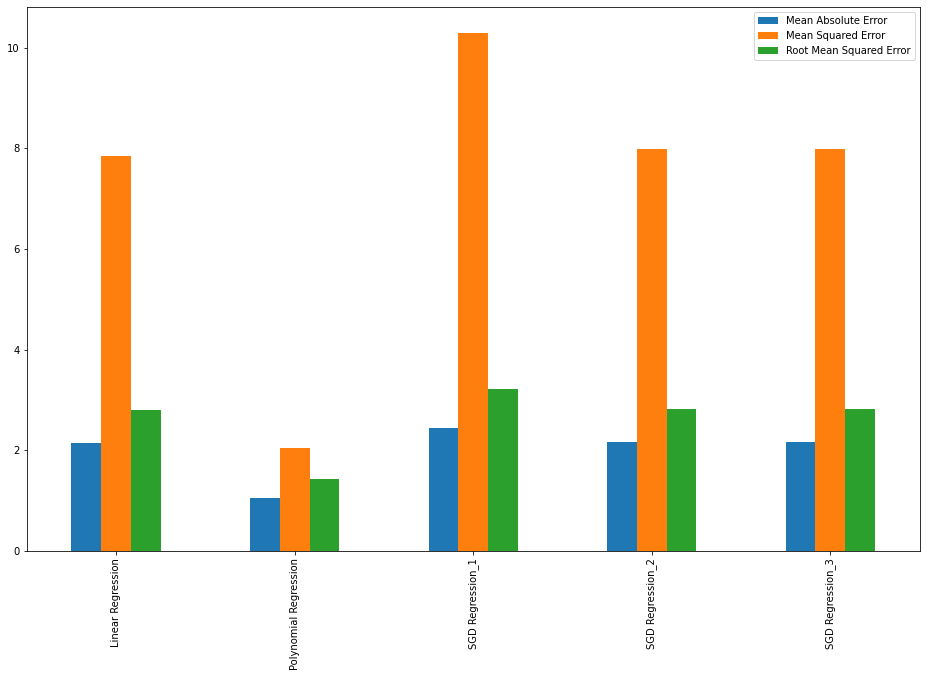

In [306]:
compare_error.plot(kind='bar',figsize=(16,10))
plt.show()

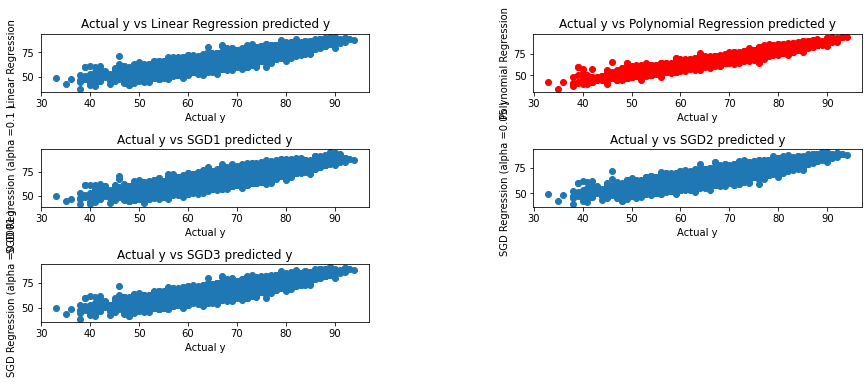

In [307]:
plt.subplot(3,2,1)
plt.scatter(y_test,y_pred_l)
plt.xlabel('Actual y')
plt.ylabel('Linear Regression')
plt.title('Actual y vs Linear Regression predicted y')

plt.subplot(3,2,2)
plt.scatter(y_test,y_pred_p,color='red')
plt.xlabel('Actual y')
plt.ylabel('Polynomial Regression')
plt.title('Actual y vs Polynomial Regression predicted y')

plt.subplot(3,2,3)
plt.scatter(y_test,y_pred_s)
plt.xlabel('Actual y')
plt.ylabel('SGD Regression (alpha =0.1 )')
plt.title('Actual y vs SGD1 predicted y')

plt.subplot(3,2,4)
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual y')
plt.ylabel('SGD Regression (alpha =0.05 )')
plt.title('Actual y vs SGD2 predicted y')

plt.subplot(3,2,5)
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual y')
plt.ylabel('SGD Regression (alpha =0.0001 )')
plt.title('Actual y vs SGD3 predicted y')

plt.subplots_adjust(left=0.1,
                    bottom=19, 
                    right=2, 
                    top=20, 
                    wspace=0.5, 
                    hspace=1)

plt.show()

### As we notice, we obtained the smallest error when using Polynomial Regression.
### So the Polynomial Regression model is the best model that can predict the y 'overall_rating'

Q3. Find the best model that can predict the y based on one feature only. You can try the following: 
    <ol>
    <li>Linear regression
    <li>Polynomial regression
    <li>SGD regression
        
<br>Try to change in the paramteres of the algorithms while checking each time the accuracy, confusion matrix and other metrics (sensitivity, ...) and the visualization of the models.

# Feature Selection

## 1.Ridge Regularization

In [308]:
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge(alpha=1.0)#choose alpha 
ridge.fit(X_train, y_train)# Fit the Ridge model
# Create the model score
ridge.score(X_test, y_test), ridge.score(X_train, y_train)

(0.83971637415843, 0.8436861262552603)

In [309]:
ridge.coef_

array([ 2.47886659, -0.00582802, -0.12289035, -0.03692631,  0.41482675,
        0.2204909 ,  1.14172457,  0.7199619 ,  0.08281525, -0.23146113,
        0.20837871,  0.2153977 ,  0.08950258,  2.04317521,  0.08646527,
        0.11006845, -0.09977502,  1.95480398,  0.09412874,  0.28412526,
        0.17350164, -0.04543281,  0.72381522, -0.25547437,  0.33206148,
        0.24691422, -0.18933493, -0.05553257,  0.24396778,  0.65497983,
        0.05426101, -0.56946826,  2.71184735,  0.54784835, -0.74219938,
        0.90880367,  0.44870763])

## 2. Lasso Regularization

In [310]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)# Fit the Lasso model
# Create the model score
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.7273548352397349, 0.7329488450593035)

In [311]:
 #print the coefficients
lasso.coef_ #more accurate because it adds penalty according to the absolute value of coefficients.

array([2.70710556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.82252265, 0.        , 0.        ,
       0.        , 0.        , 0.22765015, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [312]:
df.columns[[1,18,23]]

Index(['potential', 'reactions', 'strength'], dtype='object')

### We notice that the most accurate features are reactions and potential
### So we will try using each individually as a single feature to predict the y "overall_rating"

# Using feature "reactions"

In [313]:
X = df.iloc[:,[18]].values #reactions
y = df.iloc[:,0].values #overall_rating
X

array([[47.],
       [47.],
       [47.],
       ...,
       [74.],
       [69.],
       [66.]])

In [314]:
#splitting the data
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.25 , random_state=10)

## 1.Linear Regression

In [315]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_l = regressor.predict(X_test)
y_pred_l

array([63.79622301, 63.79622301, 66.7784882 , ..., 69.76075338,
       72.74301857, 78.1110959 ])

In [316]:
#checking result accuracy
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 3.3592624416073846
Mean Squared Error: 19.963261984929133
Root Mean Squared Error: 4.468026632074738


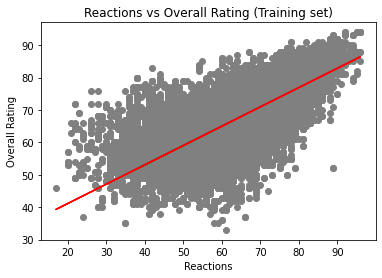

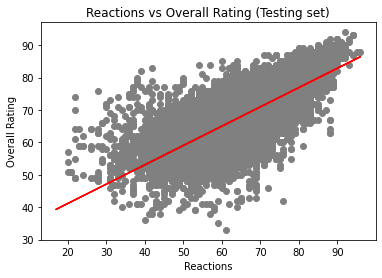

In [317]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Reactions vs Overall Rating (Training set)')
plt.xlabel('Reactions')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Reactions vs Overall Rating (Testing set)')
plt.xlabel('Reactions')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

## 2. Polynomial Regression

In [318]:
#choosing a degree of 15
PF15 =  PolynomialFeatures(degree = 15)
X_poly = PF15.fit_transform(X_train)
#applying linear regression on X_poly
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred_p2=regressor.predict(PF15.fit_transform(X_test))
y_pred_p2

array([63.18975857, 63.18975857, 65.99310266, ..., 69.23627484,
       72.84367497, 79.84798181])

In [319]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_p2))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_p2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_p2)))

Mean Absolute Error: 3.2488246300743873
Mean Squared Error: 18.786217415794255
Root Mean Squared Error: 4.33430702832578


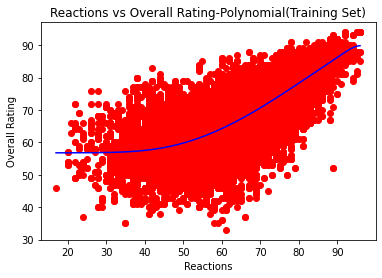

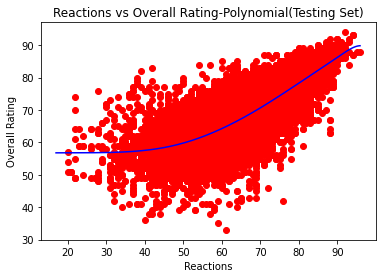

In [321]:
X_grid = np.arange(min(X_train),max(X_train),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X_train,y_train, color='red') 
  
plt.plot(X_grid, regressor.predict(PF15.fit_transform(X_grid)),color='blue') 
  
plt.title("Reactions vs Overall Rating-Polynomial(Training Set)")
plt.xlabel('Reactions')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

X_grid = np.arange(min(X_train),max(X_train),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X_test,y_test, color='red') 
  
plt.plot(X_grid, regressor.predict(PF15.fit_transform(X_grid)),color='blue') 
  
plt.title("Reactions vs Overall Rating-Polynomial(Testing Set)")
plt.xlabel('Reactions')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

## 3. SGD Regression

In [322]:
sgd = SGDRegressor(max_iter=1000,tol=1e-3,alpha=0.001)
sgd.fit(X_train, y_train)
y_pred_s = sgd.predict(X_test)
y_pred_s

array([63.35447413, 63.35447413, 66.29851641, ..., 69.24255868,
       72.18660095, 77.48587704])

In [323]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_s))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_s))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_s)))

Mean Absolute Error: 3.3998898763813306
Mean Squared Error: 20.193191333310164
Root Mean Squared Error: 4.493683492782972


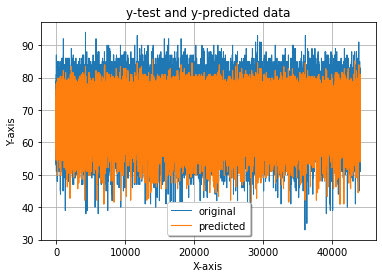

In [324]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_s, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [325]:
sgd2 = SGDRegressor(loss='epsilon_insensitive',max_iter=1000,tol=1e-3,alpha=0.005,penalty='l1',learning_rate='optimal')
sgd2.fit(X_train, y_train)
y_pred2 = sgd2.predict(X_test)
y_pred2 

array([63.55401425, 63.55401425, 66.86178366, ..., 70.16955308,
       73.47732249, 79.43130744])

In [326]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 3.359767642757742
Mean Squared Error: 20.45905643265344
Root Mean Squared Error: 4.523168848567721


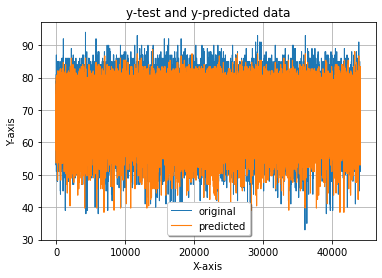

In [327]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [328]:
#compare errors
MAE = {'Linear Regression': mean_absolute_error(y_test, y_pred_l), 'Polynomial Regression': mean_absolute_error(y_test, y_pred_p2), 'SGD Regression_1': mean_absolute_error(y_test, y_pred_s), 'SGD Regression_2': mean_absolute_error(y_test, y_pred2)}
MSE = {'Linear Regression': mean_squared_error(y_test, y_pred_l), 'Polynomial Regression': mean_squared_error(y_test, y_pred_p2), 'SGD Regression_1':mean_squared_error(y_test, y_pred_s), 'SGD Regression_2': mean_squared_error(y_test, y_pred2)}
RMSE = {'Linear Regression': np.sqrt(mean_squared_error(y_test, y_pred_l)), 'Polynomial Regression': np.sqrt(mean_squared_error(y_test, y_pred_p2)), 'SGD Regression_1':np.sqrt(mean_squared_error(y_test, y_pred_s)), 'SGD Regression_2': np.sqrt(mean_squared_error(y_test, y_pred2))}
compare_error=pd.DataFrame({'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
print(compare_error)

                       Mean Absolute Error  Mean Squared Error  \
Linear Regression                 3.359262           19.963262   
Polynomial Regression             3.248825           18.786217   
SGD Regression_1                  3.399890           20.193191   
SGD Regression_2                  3.359768           20.459056   

                       Root Mean Squared Error  
Linear Regression                     4.468027  
Polynomial Regression                 4.334307  
SGD Regression_1                      4.493683  
SGD Regression_2                      4.523169  


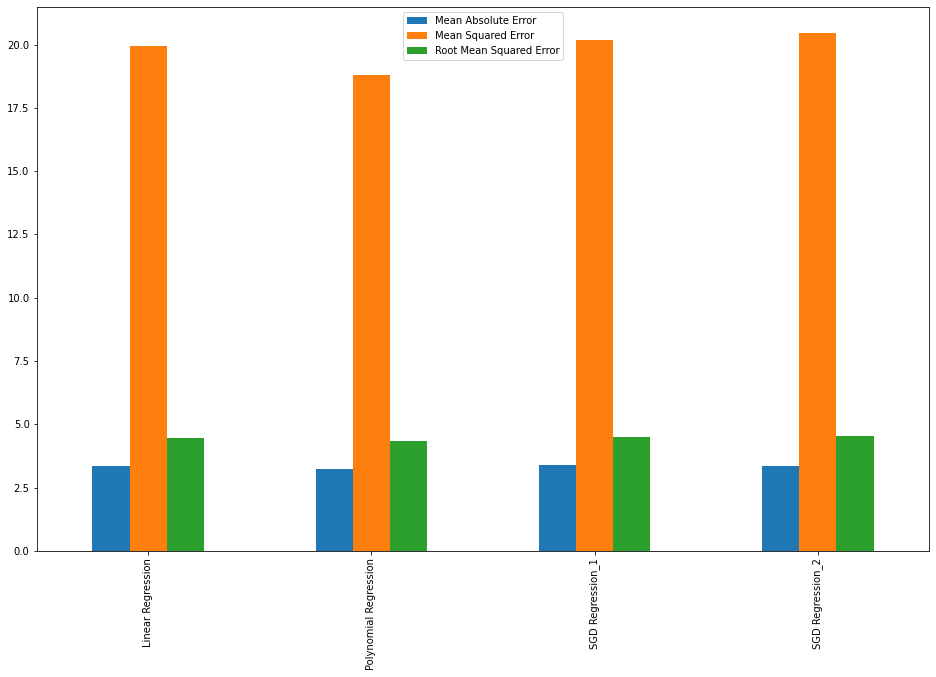

In [329]:
compare_error.plot(kind='bar',figsize=(16,10))
plt.show()

# Using feature: Potential

In [330]:
X = df.iloc[:,:1].values #potential
y = df.iloc[:,0].values #overall_rating
X

array([[67.],
       [67.],
       [62.],
       ...,
       [77.],
       [78.],
       [80.]])

In [331]:
#splitting the data
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.25 , random_state=10)

# 1.Linear Regression

In [332]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [333]:
y_pred_l = regressor.predict(X_test)
y_pred_l

array([68., 63., 57., ..., 68., 80., 77.])

In [334]:
#checking result accuracy
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 1.4333864229848113e-12
Mean Squared Error: 3.2743983517196818e-24
Root Mean Squared Error: 1.8095298703585088e-12


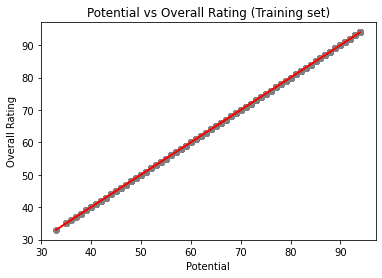

In [335]:
#plottting the training set
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Potential vs Overall Rating (Training set)')
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

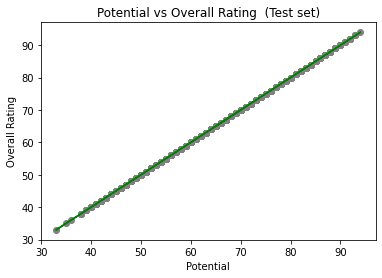

In [336]:
#plotting the testing set
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Potential vs Overall Rating  (Test set)')
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.show()

# 2. Polynomial Regression

In [337]:
#choosing a degree of 2
PF =  PolynomialFeatures(degree = 2)
X_poly = PF.fit_transform(X_train)

In [338]:
#applying linear regression on X_poly
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred_p=regressor.predict(PF.fit_transform(X_test))
y_pred_p

array([68., 63., 57., ..., 68., 80., 77.])

In [339]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_p))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_p))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_p)))

Mean Absolute Error: 3.602500555308348e-13
Mean Squared Error: 2.0744734703072046e-25
Root Mean Squared Error: 4.554638811483524e-13


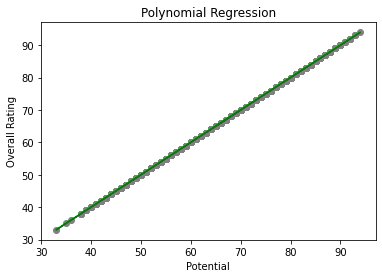

In [340]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_train, regressor.predict(PF.fit_transform(X_train)), color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.show()

In [341]:
#choosing a degree of 10
PF10 =  PolynomialFeatures(degree = 10)
X_poly = PF10.fit_transform(X_train)
#applying linear regression on X_poly
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred_p2=regressor.predict(PF10.fit_transform(X_test))
y_pred_p2

array([67.99764094, 62.99848085, 57.00850962, ..., 67.99764094,
       79.99387962, 77.000485  ])

In [342]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_p2))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_p2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_p2)))

Mean Absolute Error: 0.003329768164181592
Mean Squared Error: 5.045860159092833e-05
Root Mean Squared Error: 0.007103421822680132


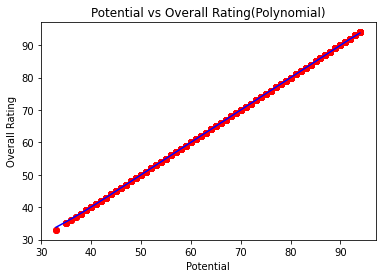

In [343]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
  
plt.plot(X_grid, regressor.predict(PF10.fit_transform(X_grid)),color='blue') 
  
plt.title("Potential vs Overall Rating(Polynomial)")
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.show()
plt.close()

# SGD Regressor

In [344]:
reg = SGDRegressor(loss='squared_loss', alpha=0.1, penalty='l2', max_iter=1000, learning_rate='constant')
reg.fit(X_train, y_train)
y_pred_s = reg.predict(X_test)
y_pred_s

array([-2.87227290e+13, -2.66103484e+13, -2.40754916e+13, ...,
       -2.87227290e+13, -3.37924426e+13, -3.25250142e+13])

In [345]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_s))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_s))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_s)))

Mean Absolute Error: 29006953863615.977
Mean Squared Error: 8.50150458100527e+26
Root Mean Squared Error: 29157339695186.992


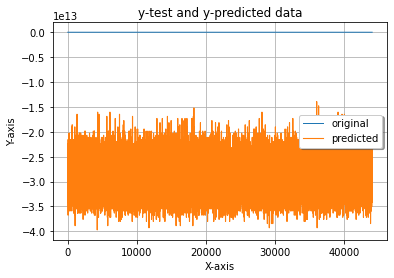

In [346]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_s, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [347]:
clf = SGDRegressor(max_iter=1000,tol=1e-3,alpha=0.001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
y_pred2 

array([67.98575305, 62.97685914, 56.96618645, ..., 67.98575305,
       80.00709843, 77.00176208])

In [348]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.014745691631013122
Mean Squared Error: 0.00032537084466782967
Root Mean Squared Error: 0.018038038825433037


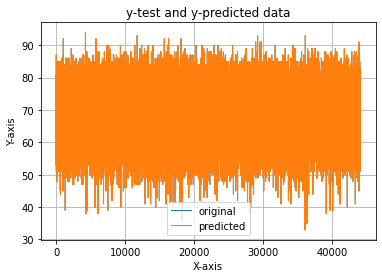

In [349]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show() 

In [350]:
#compare errors
MAE = {'Linear Regression': mean_absolute_error(y_test, y_pred_l), 'Polynomial Regression': mean_absolute_error(y_test, y_pred_p), 'SGD Regression_1': mean_absolute_error(y_test, y_pred_s), 'SGD Regression_2': mean_absolute_error(y_test, y_pred2), 'Polynomial Regression 2': mean_absolute_error(y_test, y_pred_p2)}
MSE = {'Linear Regression': mean_squared_error(y_test, y_pred_l), 'Polynomial Regression': mean_squared_error(y_test, y_pred_p), 'SGD Regression_1':mean_squared_error(y_test, y_pred_s), 'SGD Regression_2': mean_squared_error(y_test, y_pred2), 'Polynomial Regression 2': mean_squared_error(y_test, y_pred_p2)}
RMSE = {'Linear Regression': np.sqrt(mean_squared_error(y_test, y_pred_l)), 'Polynomial Regression': np.sqrt(mean_squared_error(y_test, y_pred_p)), 'SGD Regression_1':np.sqrt(mean_squared_error(y_test, y_pred_s)), 'SGD Regression_2': np.sqrt(mean_squared_error(y_test, y_pred2)), 'Polynomial Regression 2': np.sqrt(mean_squared_error(y_test, y_pred_p2))}
compare_error=pd.DataFrame({'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
print(compare_error)

                         Mean Absolute Error  Mean Squared Error  \
Linear Regression               1.433386e-12        3.274398e-24   
Polynomial Regression           3.602501e-13        2.074473e-25   
SGD Regression_1                2.900695e+13        8.501505e+26   
SGD Regression_2                1.474569e-02        3.253708e-04   
Polynomial Regression 2         3.329768e-03        5.045860e-05   

                         Root Mean Squared Error  
Linear Regression                   1.809530e-12  
Polynomial Regression               4.554639e-13  
SGD Regression_1                    2.915734e+13  
SGD Regression_2                    1.803804e-02  
Polynomial Regression 2             7.103422e-03  
